In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
def latest_version(cat):
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal_subset','source_id','table_id',
                                               'institution_id','variable_id','member_id',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat

In [3]:
#col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/master/esm-collection-spec-examples/esgf-world.json"
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [4]:
model_name = 'CESM2'

In [5]:
#mlotst, tos,uo,vo

In [6]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [7]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Omon'],
                 member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["tos"])
query_Ofx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Ofx'],
               member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["areacello"])

In [8]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [9]:
cat_Omon_tos_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
23,CMIP6,NCAR,CESM2,historical,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-201412,v20190308,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/historic...
0,CMIP6,NCAR,CESM2,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-005012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
1,CMIP6,NCAR,CESM2,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,005101-010012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
2,CMIP6,NCAR,CESM2,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,010101-015012,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
5,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,000101-015012,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
6,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,015101-019912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
7,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,020001-024912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
8,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,025001-029912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
9,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,030001-034912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...
10,CMIP6,NCAR,CESM2,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,035001-039912,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...


In [10]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [11]:
cat_Ofx_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
3,CMIP6,NCAR,CESM2,historical,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190308,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/historic...
0,CMIP6,NCAR,CESM2,1pctCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190425,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/1pctCO2/...
2,CMIP6,NCAR,CESM2,abrupt-4xCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190927,s3://esgf-world/CMIP6/CMIP/NCAR/CESM2/abrupt-4...


In [12]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': True,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [13]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [14]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.NCAR.CESM2.historical.Omon', 'CMIP6.NCAR.CESM2.1pctCO2.Omon', 'CMIP6.NCAR.CESM2.abrupt-4xCO2.Omon'])

In [15]:
dict_Ofx.keys()

dict_keys(['CMIP6.NCAR.CESM2.abrupt-4xCO2.Ofx', 'CMIP6.NCAR.CESM2.historical.Ofx', 'CMIP6.NCAR.CESM2.1pctCO2.Ofx'])

In [16]:
ds_Ofx = dict_Ofx["CMIP6.NCAR.CESM2.historical.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

In [17]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
    # Compute spherical distance from spherical coordinates.
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) =
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    cos = np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(
        phi2
    )
    arc = np.arccos(cos)
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

In [18]:
def find_closest_grid_point(lon, lat, gridlon, gridlat):
    """find integer indices of closest grid point in grid of coordinates
    gridlon, gridlat for a given geographical lon/lat.
    PARAMETERS:
    -----------
        lon (float): longitude of point to find
        lat (float): latitude of point to find
        gridlon (numpy.ndarray): grid longitudes
        gridlat (numpy.ndarray): grid latitudes
    RETURNS:
    --------
    iclose, jclose: integer
        grid indices for geographical point of interest
    """

    if isinstance(gridlon, xr.core.dataarray.DataArray):
        gridlon = gridlon.values
    if isinstance(gridlat, xr.core.dataarray.DataArray):
        gridlat = gridlat.values
    dist = distance_on_unit_sphere(lat, lon, gridlat, gridlon)
    jclose, iclose = np.unravel_index(dist.argmin(), gridlon.shape)
    return iclose, jclose


In [19]:
i,j= find_closest_grid_point(-157, -5, ds_Ofx.lon, ds_Ofx.lat)#for southwest
i,j

(215, 168)

In [20]:
k,l = find_closest_grid_point(-90, 5, ds_Ofx.lon, ds_Ofx.lat)#for northwest
k,l

(275, 205)

CALCULATING the summation of areacello

In [21]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(nlat = slice(j,l), nlon = slice(i,k))

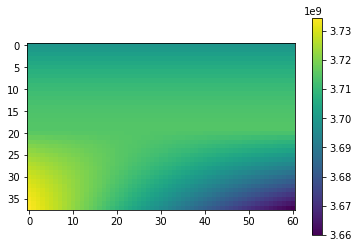

In [22]:
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [23]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('nlon', "nlat"))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

## Historical

In [24]:
ds_hist = dict_Omon_tos["CMIP6.NCAR.CESM2.historical.Omon"]


In [25]:
tm_his_st, tm_his_nd = '1980','2011'

In [26]:
ds_hist.dims

Frozen(SortedKeysDict({'member_id': 1, 'time': 1980, 'nlat': 384, 'nlon': 320, 'd2': 2, 'vertices': 4}))

In [27]:
#ds_hist = ds_hist.assign_coords( lon=(((ds_hist.nlon + 180) % 360) - 180))

In [28]:
tos_his = ds_hist.tos.sel(nlat = slice(j,l), nlon = slice(i,k), time = slice(tm_his_st, tm_his_nd))
tos_his

<xarray.DataArray 'tos' (member_id: 1, time: 384, nlat: 38, nlon: 61)>
dask.array<getitem, shape=(1, 384, 38, 61), dtype=float32, chunksize=(1, 1, 38, 61), chunktype=numpy.ndarray>
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
  * nlat       (nlat) int32 168 169 170 171 172 173 ... 200 201 202 203 204 205
  * nlon       (nlon) int32 215 216 217 218 219 220 ... 270 271 272 273 274 275
  * time       (time) object 1980-01-15 12:00:00 ... 2011-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        This may differ from "surface temperature" in regions of ...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

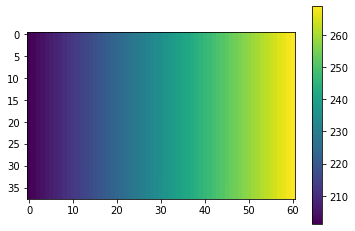

In [29]:
plt.imshow(tos_his.lon)
plt.colorbar()

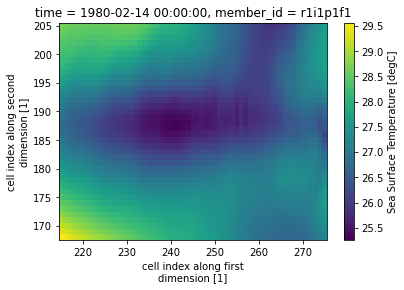

In [30]:
tos_his.isel(time=1).plot()#CESM2
#30-90 degree

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [31]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('nlon', 'nlat')) / total_areacello
#nino3_index.plot()

In [32]:
tos_mean_nino3_his = tos_mean_nino3_his.compute()


In [33]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [34]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([27.181244], dtype=float32)
Coordinates:
    time       object 1980-01-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [35]:
datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
tos_mean_nino3_his['time'] = datetimeindex


<ipython-input-35-e7b25880c2d7>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()


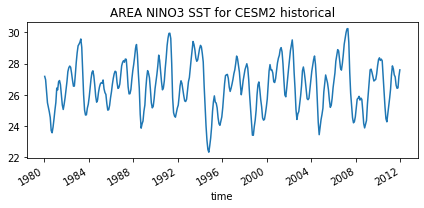

In [36]:
tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_SST_Hist_{tm_his_st}_{tm_his_nd}.png")

ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [37]:
tos_nino3_climatology = tos_mean_nino3_his.groupby('time.month').mean(dim='time')


In [38]:
tos_nino3_climatology = tos_nino3_climatology.compute()
tos_nino3_climatology

<xarray.DataArray (member_id: 1, month: 12)>
array([[26.80685 , 27.293968, 27.672989, 27.923119, 27.642405, 27.051151,
        26.354933, 25.612469, 25.28051 , 25.436607, 25.890936, 26.365957]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

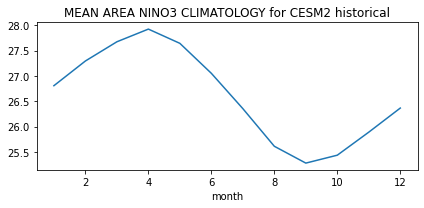

In [39]:
#tos_nino3_climatology.isel(month=0).plot()
tos_nino3_climatology.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Clima_Hist_{tm_his_st}_{tm_his_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [40]:

index_nino3 = (tos_his.groupby('time.month')-tos_nino3_climatology).mean(dim=['nlon','nlat'])

In [41]:
index_nino3 = index_nino3.compute()

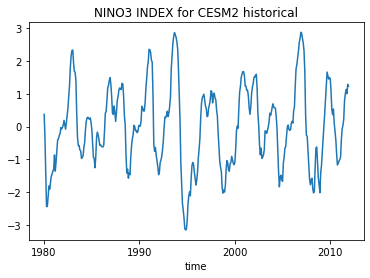

In [42]:
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} historical")
plt.savefig(f"{model_name}_Nino3Idx_Hist_{tm_his_st}_{tm_his_nd}.png")

In [87]:
np.save(f"{model_name}_SST_nino3_hist.npy", np.array(index_nino3))

## 1%CO2

In [44]:
ds_1pct = dict_Omon_tos["CMIP6.NCAR.CESM2.1pctCO2.Omon"]

In [45]:
ds_1pct.time.to_dataframe()

,time
time,
0001-01-15 12:45:00,0001-01-15 12:45:00
0001-02-14 00:00:00,0001-02-14 00:00:00
0001-03-15 12:00:00,0001-03-15 12:00:00
0001-04-15 00:00:00,0001-04-15 00:00:00
0001-05-15 12:00:00,0001-05-15 12:00:00
...,...
0150-08-15 12:00:00,0150-08-15 12:00:00
0150-09-15 00:00:00,0150-09-15 00:00:00
0150-10-15 12:00:00,0150-10-15 12:00:00


In [46]:
tm_1pct_st, tm_1pct_nd = "0119", "0150"


In [47]:
#tos_1pct = ds_1pct.tos#.sel(time = slice("1980", "2011"))

In [48]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(nlat = slice(j,l), nlon = slice(i,k), time = slice(tm_1pct_st, tm_1pct_nd))
tos_1pct

<xarray.DataArray 'tos' (member_id: 1, time: 384, nlat: 38, nlon: 61)>
dask.array<getitem, shape=(1, 384, 38, 61), dtype=float32, chunksize=(1, 1, 38, 61), chunktype=numpy.ndarray>
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
  * nlat       (nlat) int32 168 169 170 171 172 173 ... 200 201 202 203 204 205
  * nlon       (nlon) int32 215 216 217 218 219 220 ... 270 271 272 273 274 275
  * time       (time) object 0119-01-15 12:00:00 ... 0150-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        This may differ from "surface temperature" in regions of ...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

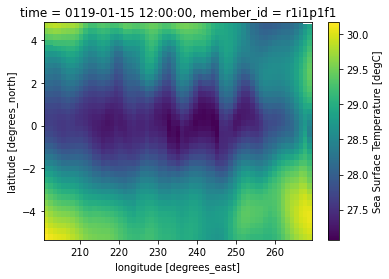

In [49]:
tos_1pct.isel(time=0).plot(x = "lon", y = "lat")

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [50]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('nlon', 'nlat')) / total_areacello
#nino3_index.plot()

In [51]:
tos_mean_nino3_1pct = tos_mean_nino3_1pct.compute()
tos_mean_nino3_1pct

<xarray.DataArray (member_id: 1, time: 384)>
array([[28.430052, 28.381498, 29.21787 , 29.919088, 30.60723 , 30.869873,
        30.710978, 30.418888, 30.165298, 30.54519 , 30.791348, 31.3989  ,
        31.588564, 31.61502 , 31.601704, 31.934114, 31.751318, 31.207027,
        30.549751, 29.452517, 29.108936, 29.488789, 29.736969, 30.369143,
        30.91757 , 31.285633, 31.635672, 32.111385, 32.18447 , 31.483246,
        30.756937, 29.606209, 28.926981, 28.981886, 29.246433, 29.839603,
        30.45468 , 30.586508, 31.226873, 31.849878, 31.76916 , 31.148472,
        30.184195, 29.255892, 28.85907 , 29.087963, 29.656382, 30.111113,
        30.547132, 30.786705, 30.631983, 31.075064, 31.400887, 31.250008,
        31.147255, 30.665905, 30.28608 , 30.40896 , 30.849138, 31.529688,
        32.03693 , 32.022785, 32.363605, 32.43725 , 32.10958 , 30.861916,
        29.339882, 28.249626, 27.07689 , 26.802935, 27.752558, 28.260576,
        28.841644, 30.043314, 30.430914, 31.151297, 31.522076, 31.50579 ,
        30.952059, 30.347546, 29.875734, 29.885317, 30.371317, 30.979317,
        31.31377 , 31.49446 , 32.081375, 32.206703, 32.47371 , 31.979198,
        31.732588, 31.37447 , 31.209957, 31.435143, 31.844843, 32.596992,
        32.925655, 32.845757, 32.748024, 32.846317, 32.861897, 32.165447,
        30.659384, 29.988503, 29.676672, 29.873154, 30.31717 , 30.752836,
        30.985249, 31.036087, 31.286339, 31.607025, 31.585989, 31.1735  ,
        30.652395, 30.011284, 30.046465, 30.389502, 31.100235, 31.774601,
...
        31.682058, 31.25957 , 31.147995, 31.355507, 31.912483, 32.52748 ,
        33.177025, 33.27651 , 33.297005, 33.63549 , 33.606514, 32.890087,
        31.788805, 30.509916, 29.920715, 30.034788, 30.248377, 30.782064,
        31.337177, 30.974495, 31.25787 , 31.938286, 32.356586, 32.367004,
        32.062317, 31.04997 , 30.656864, 30.84729 , 31.282164, 31.926346,
        32.45509 , 32.606834, 33.019154, 33.230377, 33.14542 , 32.75098 ,
        32.245983, 31.465485, 30.73049 , 30.711887, 30.919712, 31.605124,
        32.017075, 31.911625, 32.1038  , 32.35961 , 32.40259 , 31.324646,
        30.12412 , 29.373459, 28.81566 , 28.745142, 29.741064, 30.295973,
        31.002495, 31.232153, 31.975735, 32.823956, 33.14202 , 33.326584,
        33.193874, 32.98056 , 32.709618, 32.568504, 32.754192, 33.28035 ,
        33.69877 , 33.669533, 33.270206, 33.419476, 33.298435, 32.557735,
        31.670172, 30.843266, 29.806047, 29.534433, 29.66582 , 30.52172 ,
        31.348082, 31.758547, 32.35872 , 33.25995 , 33.399055, 32.921875,
        32.50656 , 31.949835, 31.212774, 31.017513, 31.813833, 32.4462  ,
        32.95527 , 33.31258 , 33.47734 , 33.562572, 33.398087, 31.923891,
        30.141571, 29.207954, 28.123318, 28.609188, 29.438437, 30.077703,
        31.058704, 31.59394 , 32.234226, 32.64382 , 33.18107 , 33.129692,
        32.809216, 32.29372 , 31.615898, 31.624006, 31.912691, 32.505856]],
      dtype=float32)
Coordinates:
  * time       (time) object 0119-01-15 12:00:00 ... 0150-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [52]:
tos_mean_nino3_1pct.size

384

In [53]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([28.430052], dtype=float32)
Coordinates:
    time       object 0119-01-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [54]:
#datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

In [55]:
#tos_mean_nino3_1pct['time'] = datetimeindex_1pct

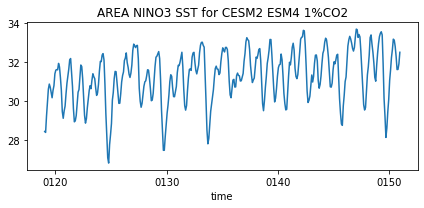

In [56]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCo2_SST_{tm_1pct_st}_{tm_1pct_nd}.png")

In [57]:
tos_nino3_climatology_1pct = tos_mean_nino3_1pct.groupby('time.month').mean(dim='time')


In [58]:
tos_nino3_climatology_1pct = tos_nino3_climatology_1pct.compute()

In [59]:
#tos_nino3_climatology_1pct.isel(month=0).plot()
print (tos_nino3_climatology_1pct)

<xarray.DataArray (member_id: 1, month: 12)>
array([[31.533152, 31.676296, 31.928476, 32.32293 , 32.41889 , 31.929735,
        31.171959, 30.443916, 29.969223, 30.093725, 30.576475, 31.18726 ]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


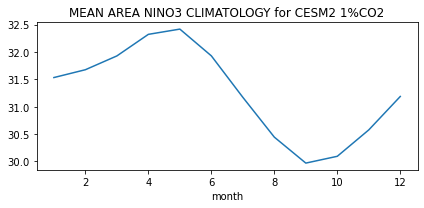

In [60]:
tos_nino3_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [64]:
#tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3_1pct = (tos_1pct.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['nlon','nlat'])

In [65]:
index_nino3_1pct = index_nino3_1pct.compute()

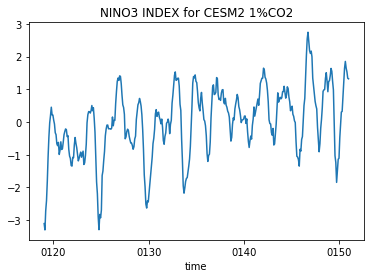

In [66]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3_1pct.plot()
plt.title(f"NINO3 INDEX for {model_name} 1%CO2")
plt.savefig(f"{model_name}_1pctCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

In [88]:
np.save(f"{model_name}_SST_nino3_1pct.npy", np.array(index_nino3_1pct))

## Abrupt-4xCO2

In [68]:
ds_4x = dict_Omon_tos["CMIP6.NCAR.CESM2.abrupt-4xCO2.Omon"]

In [69]:
#ds_4x.time.to_dataframe()
tm_4x_st,tm_4x_nd = "0119", "0150"

In [70]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(nlat = slice(j,l), nlon= slice(i,k), time = slice(tm_4x_st,tm_4x_nd) )
tos_4x

<xarray.DataArray 'tos' (member_id: 1, time: 384, nlat: 38, nlon: 61)>
dask.array<getitem, shape=(1, 384, 38, 61), dtype=float32, chunksize=(1, 1, 38, 61), chunktype=numpy.ndarray>
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(38, 61), meta=np.ndarray>
  * nlat       (nlat) int32 168 169 170 171 172 173 ... 200 201 202 203 204 205
  * nlon       (nlon) int32 215 216 217 218 219 220 ... 270 271 272 273 274 275
  * time       (time) object 0119-01-15 12:00:00 ... 0150-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        TEMP[:,0,:,:]
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

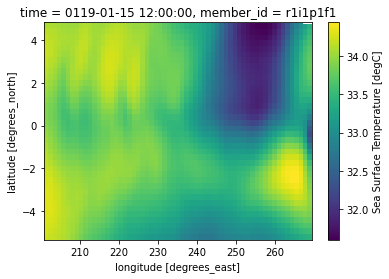

In [71]:
tos_4x.isel(time=0).plot(x = "lon", y = "lat")

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [72]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('nlon', 'nlat')) / total_areacello
#nino3_index.plot()

In [73]:
tos_mean_nino3_4x = tos_mean_nino3_4x.compute()
tos_mean_nino3_4x

<xarray.DataArray (member_id: 1, time: 384)>
array([[33.47089 , 33.276295, 33.253563, 33.692276, 34.088547, 33.4696  ,
        32.550224, 31.841814, 31.843037, 32.020542, 32.47644 , 33.070206,
        33.31918 , 33.022057, 33.096992, 33.523926, 34.13281 , 33.88498 ,
        33.209255, 33.025635, 33.267654, 33.515972, 33.752285, 34.27389 ,
        34.530952, 34.380787, 34.074467, 33.946354, 34.00621 , 33.562134,
        32.474266, 31.423712, 31.07836 , 31.435453, 32.282597, 32.98431 ,
        33.26048 , 33.40098 , 33.65772 , 34.102375, 34.24522 , 34.232315,
        33.55366 , 32.568363, 31.804392, 31.725277, 32.089226, 32.673065,
        32.89482 , 32.93519 , 33.020638, 33.371086, 33.72312 , 33.294113,
        32.38431 , 31.87159 , 31.912998, 32.477993, 33.34846 , 33.953453,
        34.22628 , 34.319656, 34.449936, 34.246162, 34.59475 , 34.021564,
        32.74473 , 31.809402, 31.86311 , 31.969652, 32.456997, 33.13005 ,
        33.558117, 33.506027, 33.78363 , 34.076626, 33.964733, 32.957256,
        32.38459 , 31.8305  , 31.64299 , 31.99569 , 32.2632  , 33.034702,
        33.48708 , 33.077797, 33.18698 , 33.719246, 33.553608, 32.935165,
        32.0843  , 31.327007, 30.702787, 30.862425, 31.48937 , 32.296425,
        32.675213, 33.02464 , 33.533207, 34.102623, 34.01483 , 33.43759 ,
        32.719913, 31.855501, 31.402893, 31.484774, 32.02335 , 32.76433 ,
        32.70139 , 32.309494, 32.900127, 33.55897 , 33.888268, 33.699726,
        33.112133, 32.61086 , 32.201015, 32.33375 , 32.879463, 33.568146,
...
        33.441814, 32.012405, 31.319128, 31.486292, 32.028397, 32.973713,
        33.376125, 33.23013 , 33.44102 , 33.693874, 34.243656, 33.73083 ,
        32.90595 , 32.046963, 31.552164, 31.670515, 32.404   , 33.11822 ,
        33.57441 , 33.632324, 33.821712, 34.440063, 34.63525 , 34.581455,
        34.370552, 34.013943, 33.901352, 34.046288, 34.44235 , 34.731125,
        34.84423 , 34.37556 , 34.261982, 34.41164 , 34.497833, 34.40093 ,
        34.16834 , 33.97923 , 33.583836, 33.278824, 33.712803, 34.065907,
        34.396294, 34.51484 , 34.442467, 34.51796 , 34.560333, 34.274246,
        33.62645 , 33.028248, 32.545303, 32.638657, 33.157154, 33.716972,
        34.09599 , 34.127716, 33.86093 , 33.781868, 34.072277, 33.662605,
        33.071342, 32.774906, 32.779556, 32.622036, 32.899426, 33.598484,
        34.09984 , 33.87503 , 33.6367  , 34.098766, 34.164997, 33.682167,
        32.837578, 32.099483, 31.641106, 31.709736, 32.2723  , 33.015892,
        33.485542, 33.167492, 33.251194, 33.720715, 34.073486, 33.977467,
        33.573032, 33.547993, 33.44165 , 33.310825, 33.731586, 34.29953 ,
        34.800594, 35.016174, 34.887424, 34.763077, 34.82573 , 34.552048,
        33.78551 , 33.402348, 33.25851 , 33.494404, 33.7953  , 34.33726 ,
        34.596283, 34.218746, 34.39466 , 34.78499 , 34.659496, 34.290627,
        33.67563 , 33.146084, 32.776962, 33.038296, 33.453785, 34.087597]],
      dtype=float32)
Coordinates:
  * time       (time) object 0119-01-15 12:00:00 ... 0150-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [74]:
tos_mean_nino3_4x.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [75]:
tos_mean_nino3_4x.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([33.47089], dtype=float32)
Coordinates:
    time       object 0119-01-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [76]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


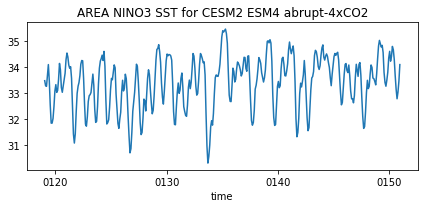

In [77]:
tos_mean_nino3_4x.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCo2_SST_{tm_4x_st}_{tm_4x_nd}.png")

In [78]:
tos_nino3_climatology_4x = tos_mean_nino3_4x.groupby('time.month').mean(dim='time')


In [79]:
tos_nino3_climatology_4x = tos_nino3_climatology_4x.compute()
tos_nino3_climatology_4x

<xarray.DataArray (member_id: 1, month: 12)>
array([[33.866074, 33.74961 , 33.828957, 34.132748, 34.288086, 33.935745,
        33.225098, 32.61165 , 32.34307 , 32.47513 , 32.962822, 33.592815]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [80]:
print(tos_nino3_climatology_4x)

<xarray.DataArray (member_id: 1, month: 12)>
array([[33.866074, 33.74961 , 33.828957, 34.132748, 34.288086, 33.935745,
        33.225098, 32.61165 , 32.34307 , 32.47513 , 32.962822, 33.592815]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


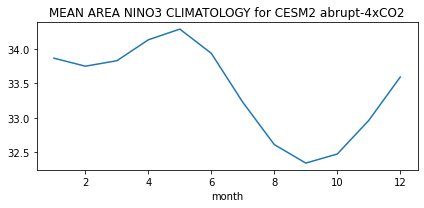

In [81]:
tos_nino3_climatology_4x.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCO2_Clima_{tm_4x_st}_{tm_4x_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [82]:
#tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['nlon','nlat'])

In [83]:
index_nino3_4x = index_nino3_4x.compute()

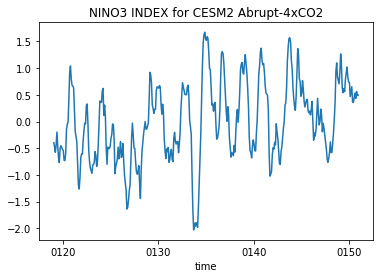

In [84]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex

index_nino3_4x.plot()
plt.title(f"NINO3 INDEX for {model_name} Abrupt-4xCO2")
plt.savefig(f"{model_name}_4xCO2_Nino3Idx_{tm_4x_st}_{tm_4x_nd}.png")

In [91]:
np.save(f"{model_name}_SST_nino3_4x.npy", np.array(index_nino3_4x))